
# The Movie Database Investigating 
### "TMDb" Udacity Frist Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
##  $\color{Green}{\text{Introduction}}$

The Movie Database (TMDb) is a community built movie and TV database, The data set Collected contains information about 10000 movies with Certain columns, like ‘user ratings’, ‘revenue’, ‘budget’,‘cast’, ‘user ratings’, ‘genres’ And so on. there will be many Questions we could have it answerd that help producers to gain more success and more satisficed audience.

### $\color{Lime}{\text{Questions To Answer}}$
<ul>
    <li>Which genres are most popular?</li>
    <li>Actors with the most appearances in films.</li>
    <li>How increasing is the industry?</li>
    <li>The Mean of Budget and how Profitable.</li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import matplotlib.pyplot as plt 
%matplotlib inline
"""Removing e from numbers"""
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## $\color{Orange}{\text{Data Wrangling}}$

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_data = pd.read_csv('tmdb-movies.csv')
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [3]:
movies_data.shape

(10866, 21)

In [4]:
print(list(movies_data.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


As we see in the dataframe describtion 50% percent of movies have 0 budget and revenue 75% of movies have more than 90 minutes
at least 10 people has voted the least movie
there is movies with 15 hour runtime 

In [7]:
movies_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

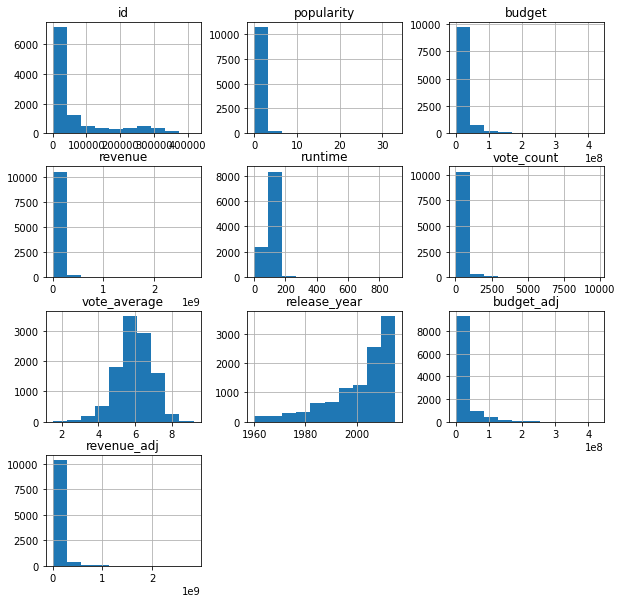

In [8]:
movies_data.hist(figsize = (10, 10));

In [9]:
movies_data.duplicated().sum()

1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [10]:
# Droping null Cells in cast and genres.
movies_data = movies_data[movies_data["cast"].isnull() == False]
movies_data = movies_data[movies_data["genres"].isnull() == False]
# addinh profit earned cloumn
movies_data["profit_earned"] = movies_data["revenue_adj"]-movies_data["budget_adj"]
# droping Duplicates.
movies_data.drop_duplicates(inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most contained in Movies?)

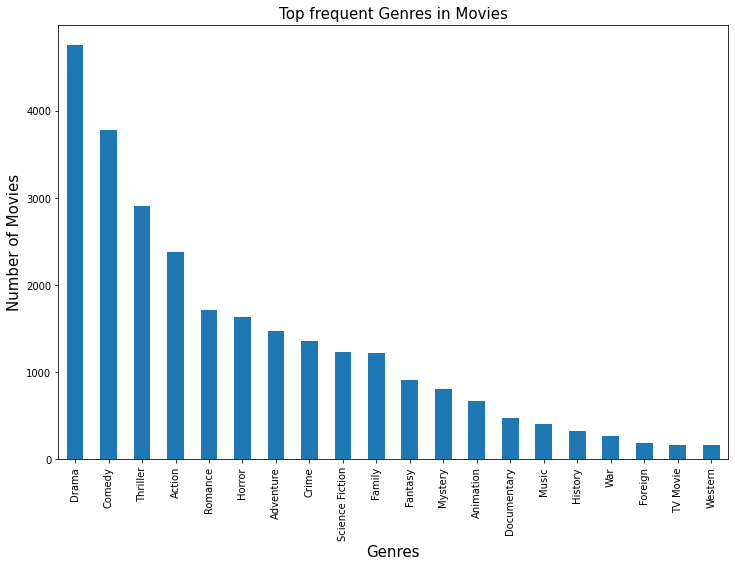

In [11]:
movies_data.genres.str.split('|', expand=True).stack().value_counts()[0:21].sort_values(ascending=False)[::1].plot(kind = 'bar', figsize=(12, 8))
plt.title('Top frequent Genres in Movies', size=15)
plt.xlabel('Genres', size=15)
plt.ylabel('Number of Movies', size=15)
plt.show()

Here we see that top five Genres are Drama Comedy Thriller 

### Research Question 2  (Actors with the most appearances in films.)

C:\Users\Mina Habib\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


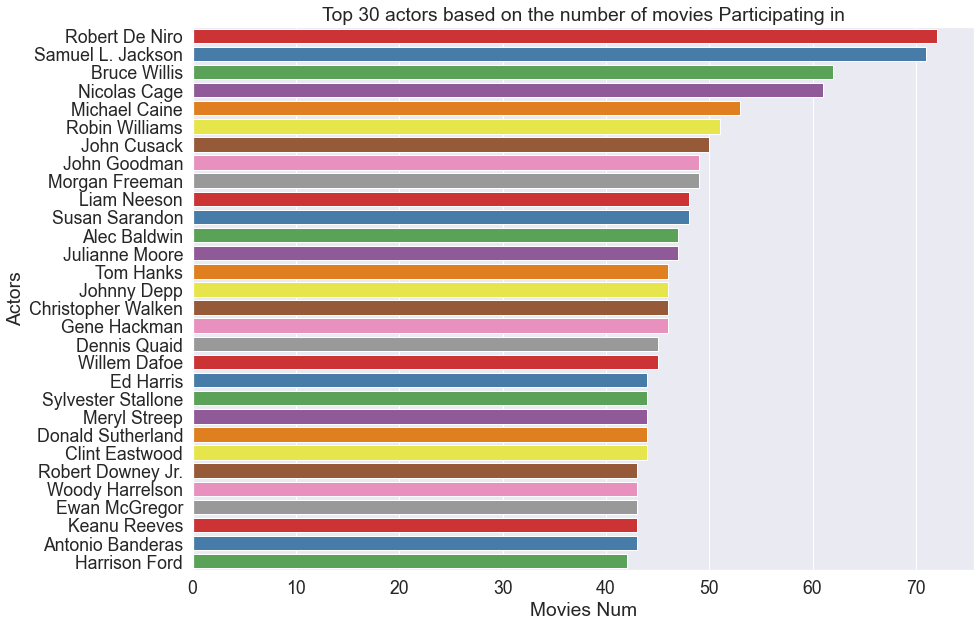

In [12]:
best_actors = {}

actor = movies_data["cast"]
actor = actor.str.split("|")
actor = np.array(actor)
for actorsList in actor:
    for actor in actorsList:
        actor = actor.lstrip()
        if actor not in best_actors:
            best_actors[actor] = 1
        else:
            best_actors[actor] += 1
                
new_best_actors = sorted(best_actors.items(), key = lambda x: x[1], reverse = True)



x_axis = list()
y_axis = list()

for item in new_best_actors[0:30]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(14,10)}, font_scale=1.6)
ax = sns.barplot(y_axis, x_axis, palette="Set1")

ax.set(xlabel='Movies Num', ylabel='Actors', title = 'Top 30 actors based on the number of movies Participating in')
plt.show()

### Research Question 3 (How increasing is the Cenima industry, average revenue per movie margin & runtime?)

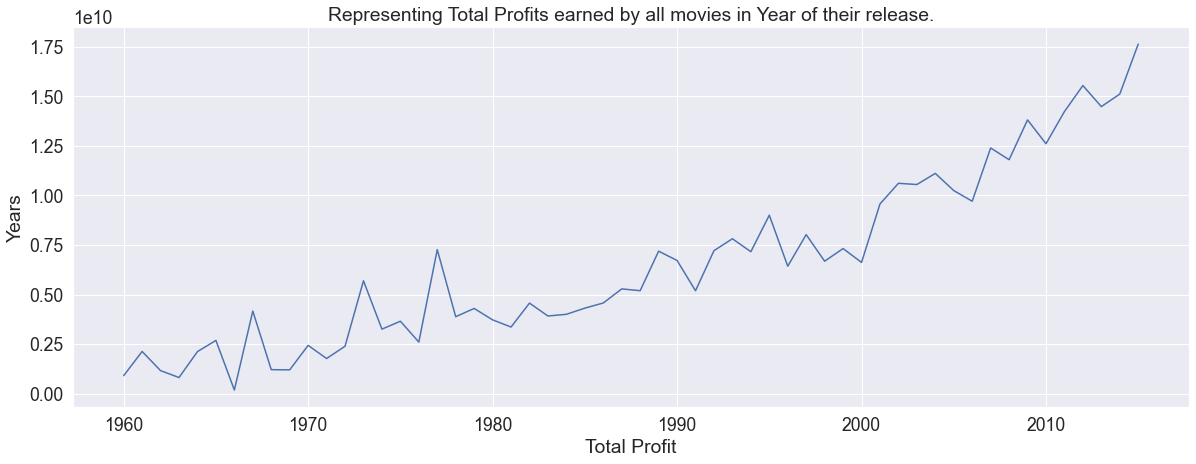

In [13]:
profits_year = movies_data.groupby('release_year')['profit_earned'].sum().plot(kind='line', figsize=(20, 7))
plt.title('Representing Total Profits earned by all movies in Year of their release.')
plt.xlabel('Total Profit')
plt.ylabel('Years')
plt.show()

here we see that the Cinema industry is growing

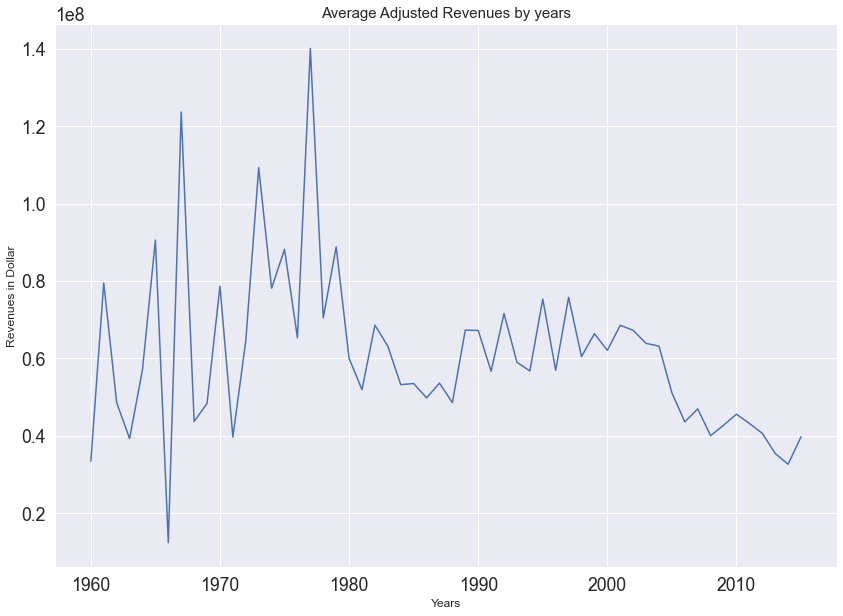

In [14]:
mean_adj_revenue = movies_data.groupby('release_year')['revenue_adj'].mean()
plt.plot(mean_adj_revenue)
plt.title('Average Adjusted Revenues by years', size=15);
plt.xlabel('Years', size=12)
plt.ylabel('Revenues in Dollar', size=12);

but here the revenue average ber movie is going down cause of number of movies 

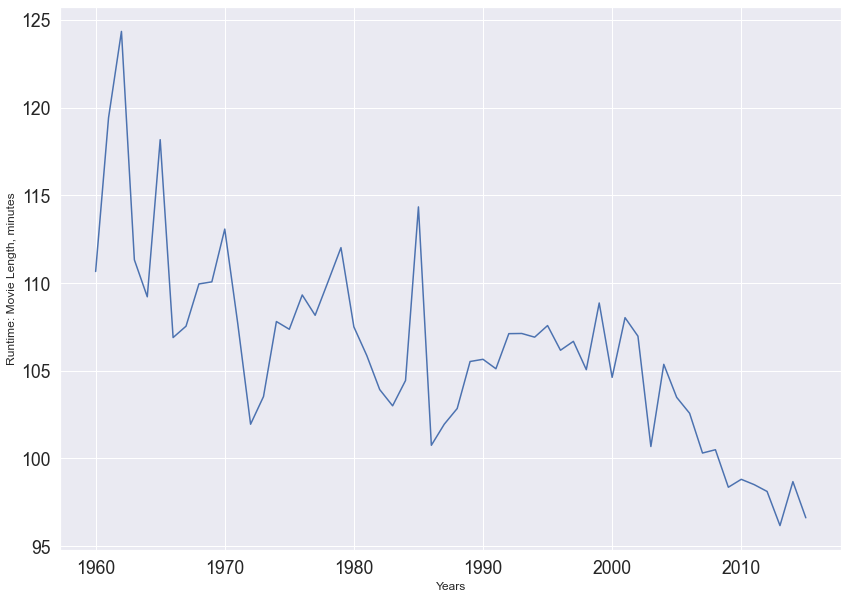

In [15]:
runtime = movies_data.groupby('release_year')['runtime'].mean()
plt.plot(runtime)
plt.xlabel('Years', size=12)
plt.ylabel('Runtime: Movie Length, minutes', size=12);

runtime avarage 2015 is less than before with a mergin of 30 minutes 

### Research Question 4 (The Most popular & Profitable Movies  )

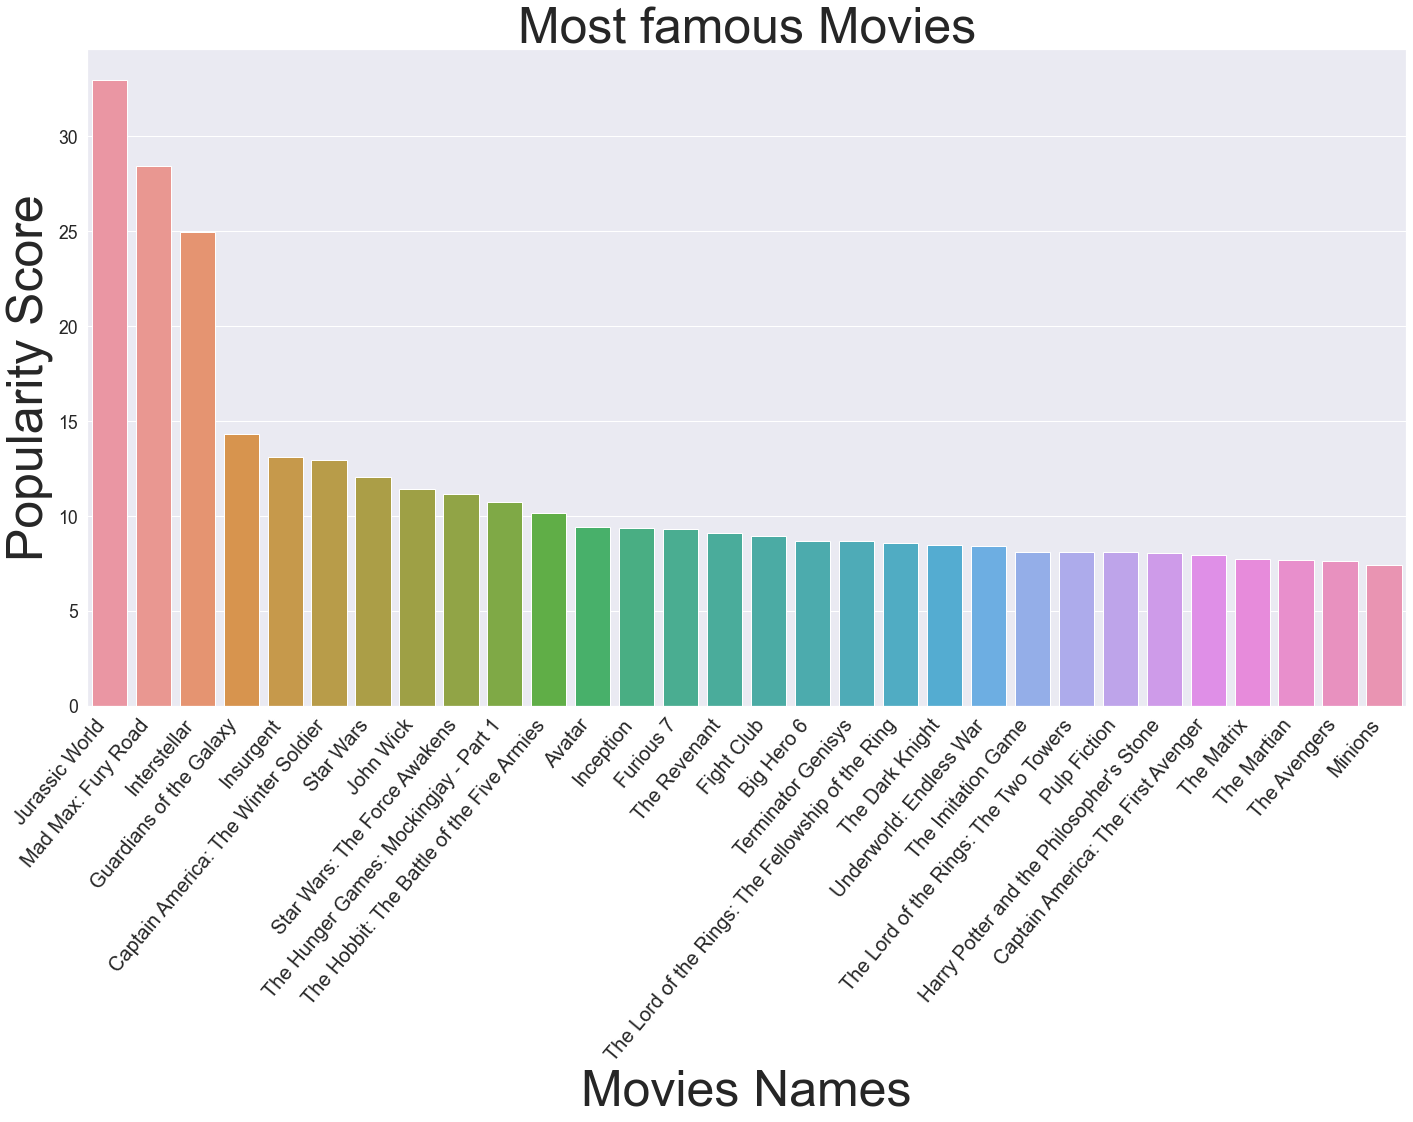

In [16]:
movies_sorted_by_popularity = movies_data.sort_values(by =  'popularity' , ascending = False)[0:30]
plt.figure(figsize = (20,15)) #set a figure size
ax=sns.barplot(x = 'original_title' , y = 'popularity', data =movies_sorted_by_popularity) #plots bar graph for 30 popular movies 
#rotate xtick labels by 50 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize = 20)
plt.tight_layout()
#gives names to x-axis , y-axis & the title
plt.xlabel('Movies Names' , fontsize = 50)
plt.ylabel('Popularity Score' , fontsize = 50)
plt.title('Most famous Movies',fontsize = 50)
plt.show()

here we see that Jurassic world mad max and interstellar are most popular movies by huge margin

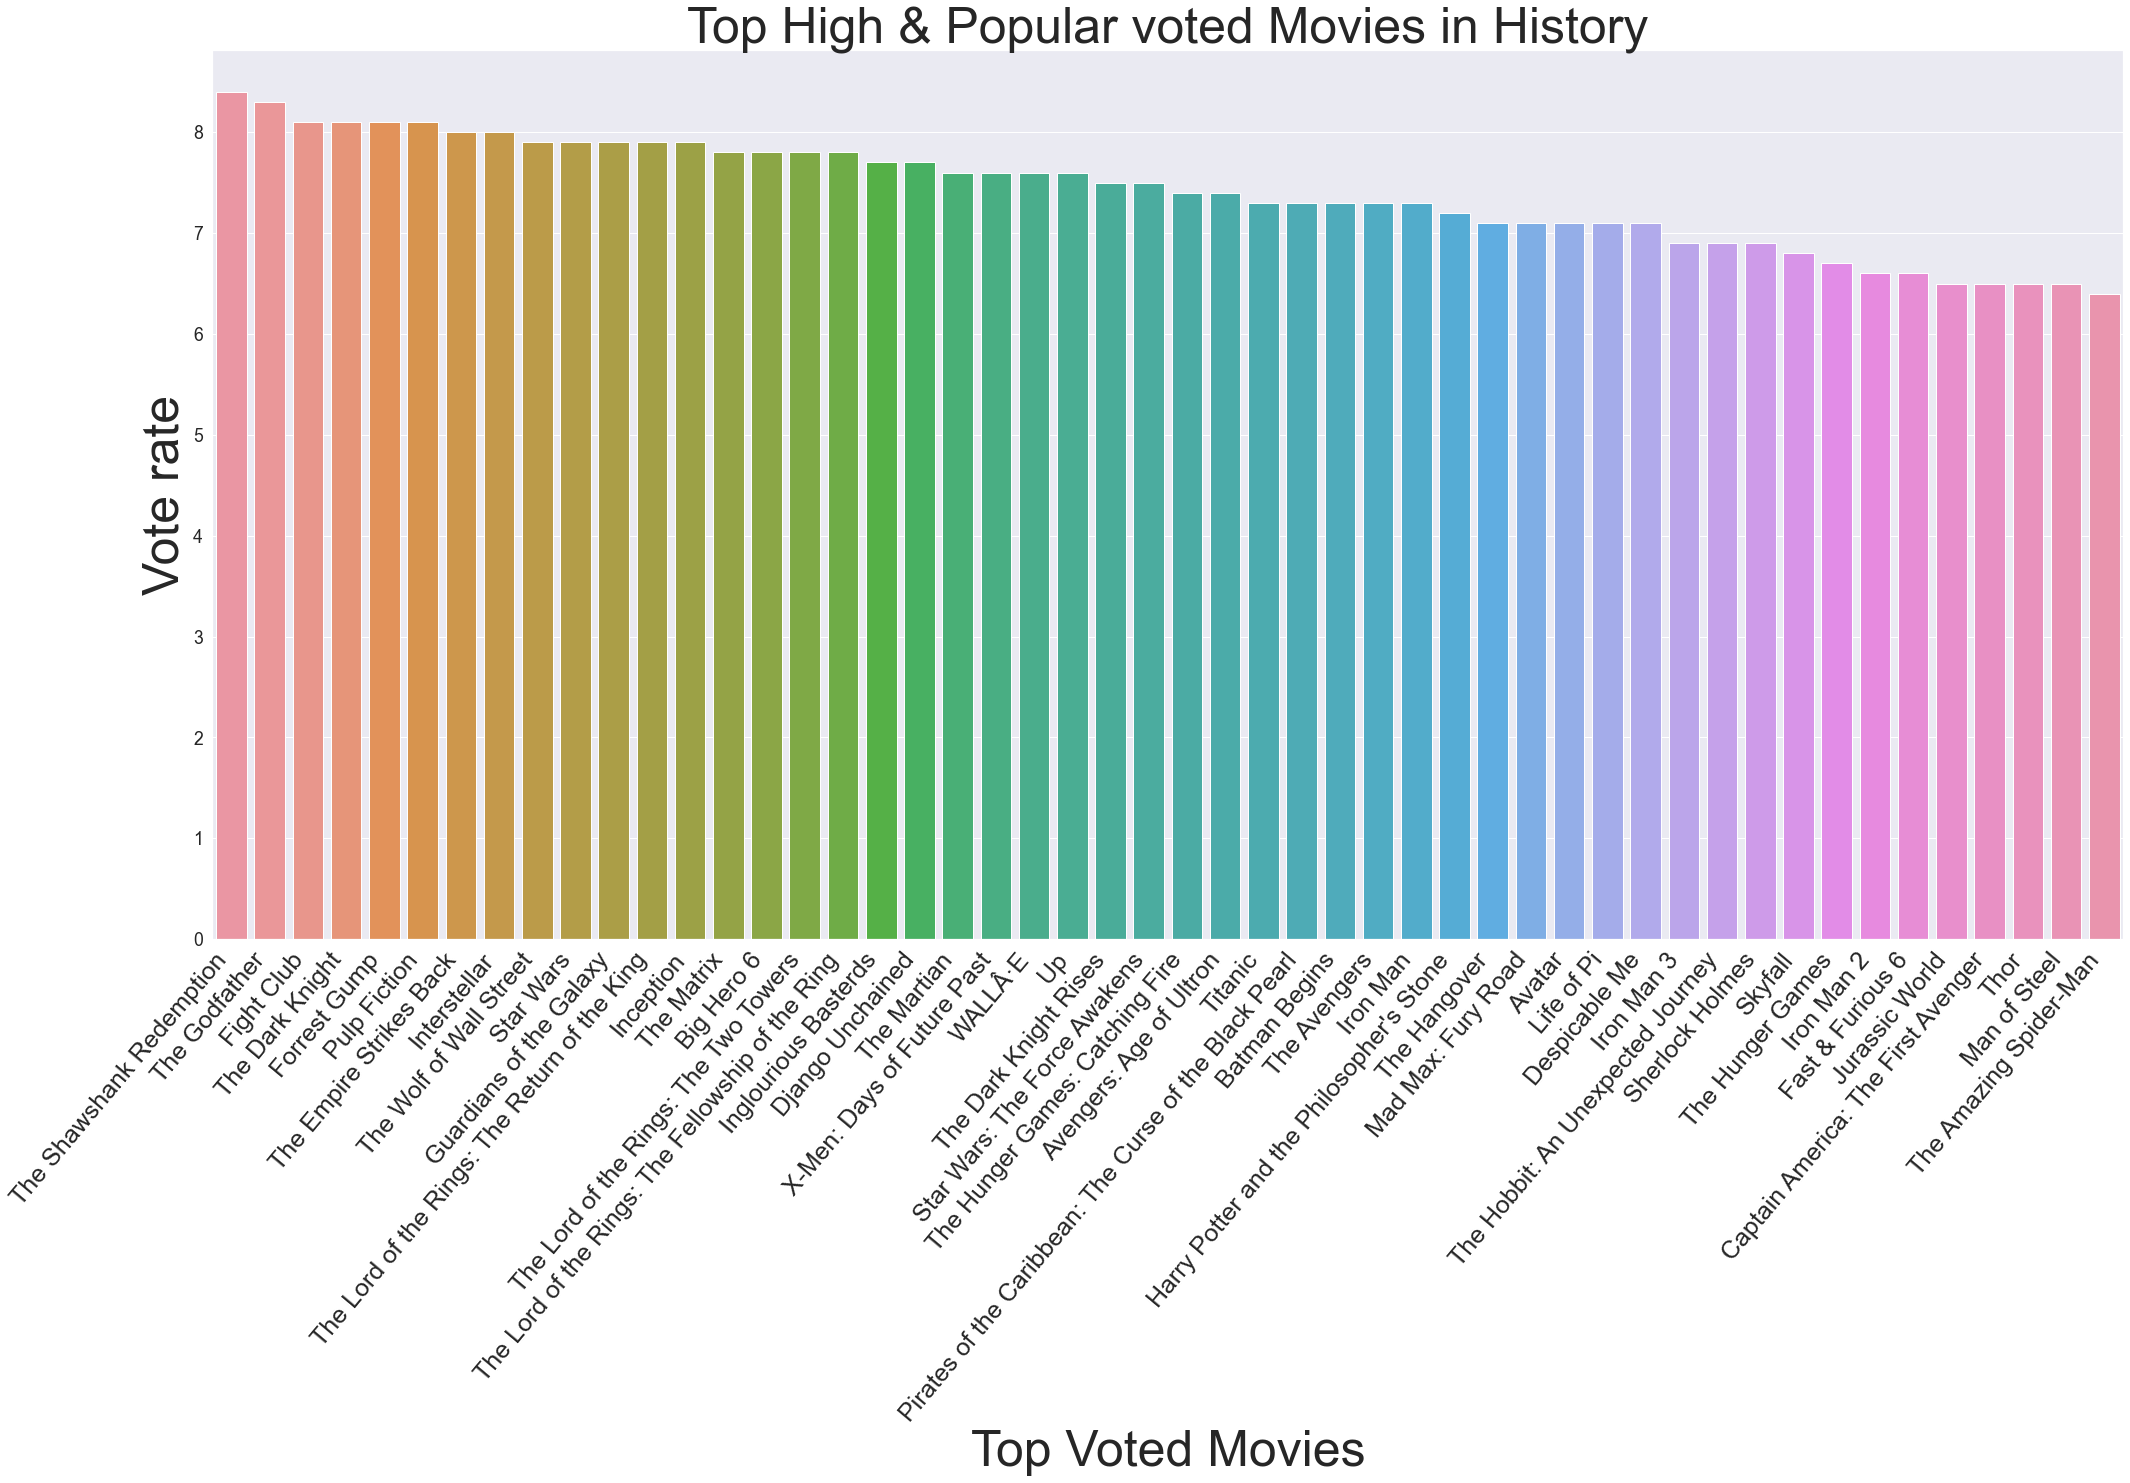

In [17]:
movies_vote_count_sorted= movies_data.sort_values(by = 'vote_count' , ascending = False)[0:50]
av_movies_vote_count_sorted= movies_vote_count_sorted.sort_values(by = 'vote_average' , ascending = False)[0:50]
plt.figure(figsize = (30,20)) #set a figure size
ax=sns.barplot(x = 'original_title' , y = 'vote_average', data =av_movies_vote_count_sorted) #plots bar graph for movies by votes count and average
#rotate xtick labels by 40 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize = 25)
plt.tight_layout()
#gives names to x-axis , y-axis & the title
plt.xlabel('Top Voted Movies' , fontsize = 50)
plt.ylabel('Vote rate' , fontsize = 50)
plt.title('Top High & Popular voted Movies in History',fontsize = 50)
plt.show()

top movies with highest voters and ratings

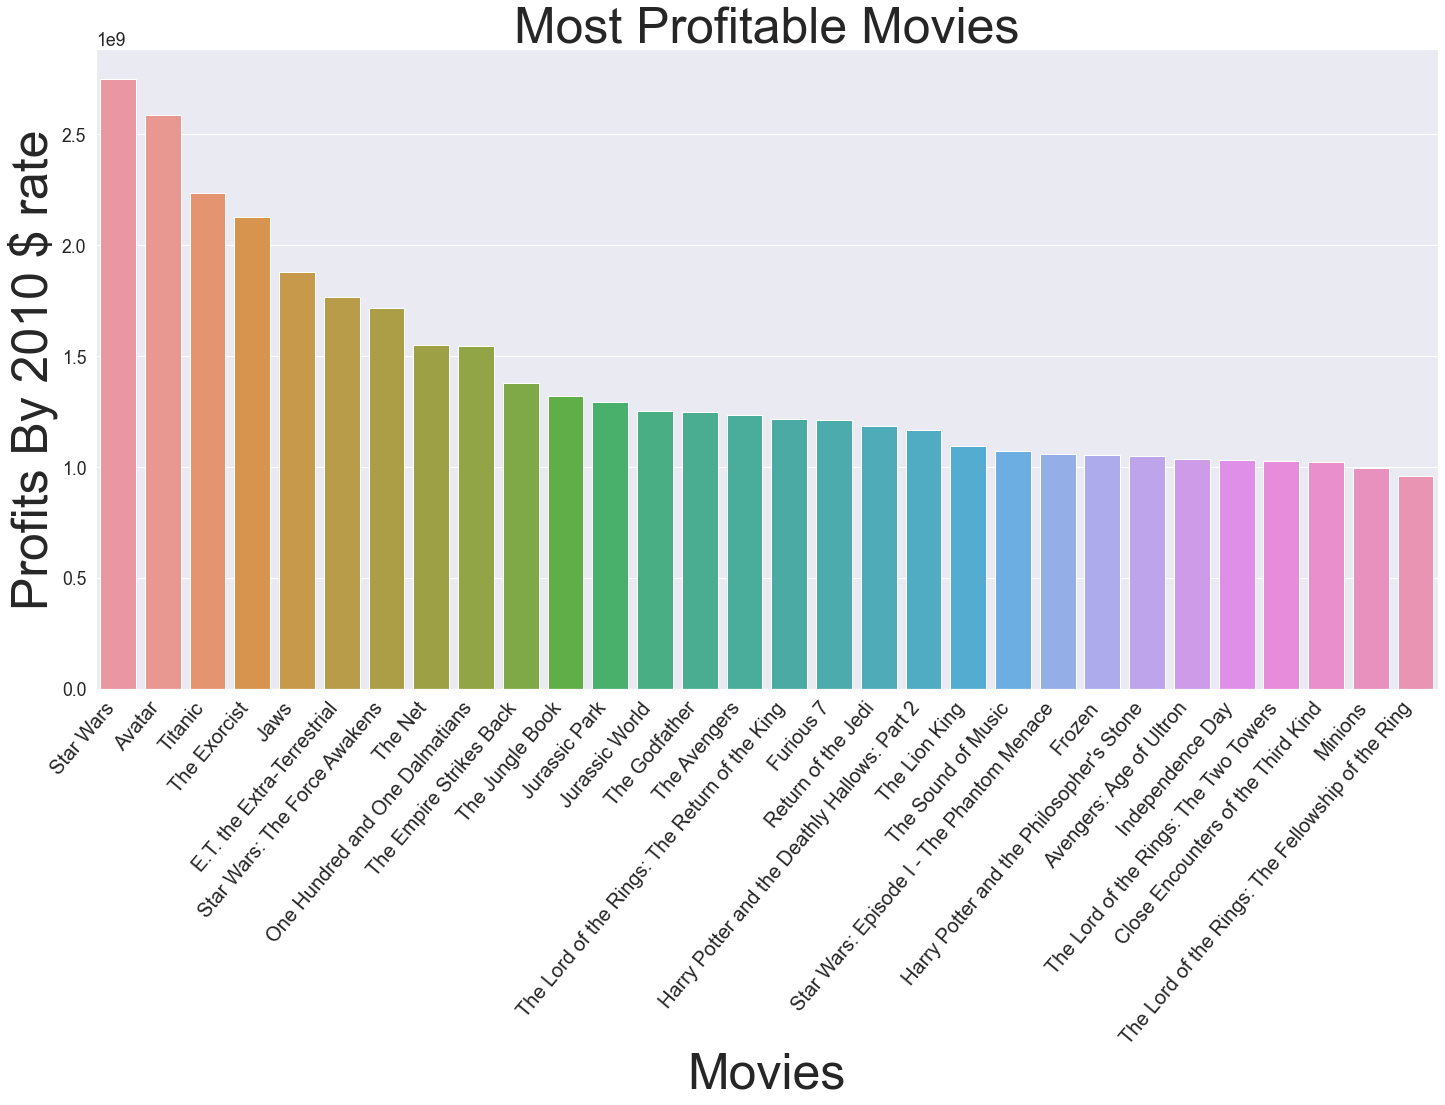

In [18]:
movies_sorted_by_profit_earned = movies_data.sort_values(by =  'profit_earned' , ascending = False)[0:30]
plt.figure(figsize = (20,15)) #set a figure size
ax=sns.barplot(x = 'original_title' , y = 'profit_earned', data =movies_sorted_by_profit_earned) #plots bar graph for movies by profitabilty
#rotate xtick labels by 40 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize = 20)
plt.tight_layout()
#gives names to x-axis , y-axis & the title
plt.xlabel('Movies' , fontsize = 50)
plt.ylabel('Profits By 2010 $ rate' , fontsize = 50)
plt.title('Most Profitable Movies',fontsize = 50)
plt.show()

Star Wars is the most profitable movie 

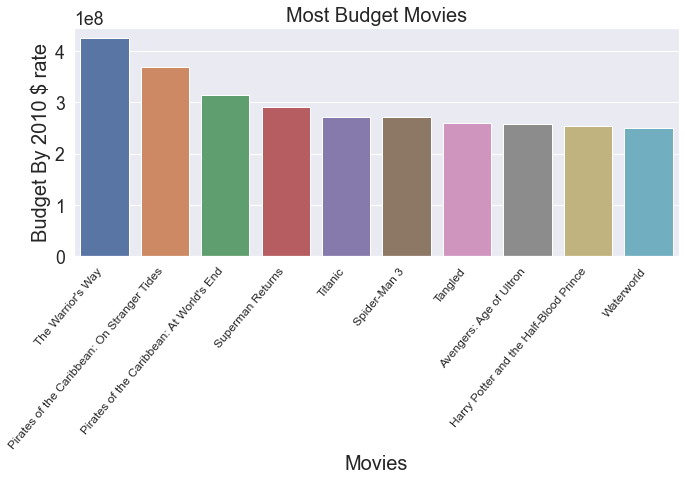

In [19]:
movies_sorted_by_budget_adj = movies_data.sort_values(by =  'budget_adj' , ascending = False)[0:10]
plt.figure(figsize = (10,7)) #set a figure size
ax=sns.barplot(x = 'original_title' , y = 'budget_adj', data =movies_sorted_by_budget_adj) #plots bar graph for movies title by popularity
#rotate xtick labels by 40 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize = 12)
plt.tight_layout()
#gives names to x-axis , y-axis & the title
plt.xlabel('Movies' , fontsize = 20)
plt.ylabel('Budget By 2010 $ rate' , fontsize = 20)
plt.title('Most Budget Movies',fontsize = 20)
plt.show()

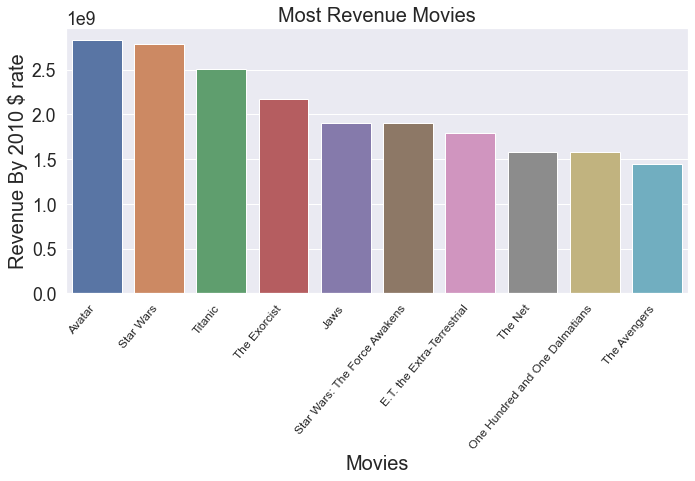

In [20]:
movies_sorted_by_revenue_adj = movies_data.sort_values(by =  'revenue_adj' , ascending = False)[0:10]
plt.figure(figsize = (10,7)) #set a figure size
ax=sns.barplot(x = 'original_title' , y = 'revenue_adj', data =movies_sorted_by_revenue_adj) #plots bar graph for movies title by popularity
#rotate xtick labels by 40 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize = 12)
plt.tight_layout()
#gives names to x-axis , y-axis & the title
plt.xlabel('Movies' , fontsize = 20)
plt.ylabel('Revenue By 2010 $ rate' , fontsize = 20)
plt.title('Most Revenue Movies',fontsize = 20)
plt.show()

as we see just Titanic is the one movie included in the top budjet and revenue charts for top 10 movies, that we could understand that is this in dustry the more budget movies dosen't have to gain more profits

<a id='conclusions'></a>
## Conclusions

The industry is highly profitable and increasing enormously, but lots of movies makes it more Competitive, we have seen top movies by many criterias of sorting top actors, hope you find it useful work

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1